# 3. 平滑化
平滑化のアイディアとして

* Savitzky_Golay:移動多項式近似
* 移動平均 (当然ながら，ほぼSavitzky_Golayと一致する)

フーリエ変換による高周波の削除など，他にも色々な手法が考えられる

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from sklearn.metrics import mean_squared_error

,cell_3_rolling_ball,cell_3_psalsa,cell_3_iasls,cell_3_iarpls,cell_3_drpls,cell_3_derpsalsa,cell_3_aspls,cell_3_asls,cell_3_arpls,cell_3_airpls,...,cell_4_rolling_ball,cell_4_psalsa,cell_4_iasls,cell_4_iarpls,cell_4_drpls,cell_4_derpsalsa,cell_4_aspls,cell_4_asls,cell_4_arpls,cell_4_airpls
601.000000,-0.372132,-0.626860,-0.026400,-0.613445,-0.608734,-0.006418,-4.861010e-01,-0.369830,-0.660158,-0.293534,...,0.472633,-0.104665,4.128631,-0.200240,-0.191398,0.324798,-1.977511e-01,3.623275,-0.161901,10.178037
601.499750,-0.057168,-0.313921,0.305558,-0.304997,-0.305730,0.330054,-1.993309e-01,-0.041632,-0.353180,0.036393,...,0.665620,0.092520,4.308982,0.002127,0.007925,0.525541,2.523640e-10,3.811086,0.037104,10.323568
601.999500,-0.065119,-0.324139,0.314355,-0.319703,-0.325874,0.343365,-2.356611e-01,-0.036594,-0.369357,0.043160,...,0.564675,-0.004390,4.195238,-0.089600,-0.086844,0.432188,-9.629316e-02,3.704801,-0.057986,10.175002
602.499250,-0.436969,-0.698492,-0.040990,-0.698537,-0.710133,-0.007467,-6.359624e-01,-0.395699,-0.749659,-0.314216,...,0.117243,-0.447950,3.734843,-0.527974,-0.528257,-0.007816,-5.391600e-01,3.251865,-0.499724,9.679786
602.998999,0.328308,0.064049,0.740546,0.059538,0.042542,0.778582,1.009537e-01,0.382079,0.006950,0.465290,...,0.818684,0.257199,4.423156,0.182369,0.179051,0.700889,1.668334e-01,3.947637,0.207252,10.333279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598.001001,0.340049,-0.179380,0.374200,-0.235934,-0.289161,0.249345,-2.872810e-01,0.135060,-0.274537,0.175873,...,0.116275,-0.241690,2.877238,-0.235623,-0.288783,3.247841,-2.872125e-01,0.160738,-0.274653,2.855890
1598.500750,0.638790,0.116084,0.671413,0.057749,0.006068,0.546083,5.329071e-15,0.432290,0.020895,0.473188,...,0.409051,0.054639,3.181851,0.058386,0.006424,3.555542,6.661338e-16,0.451811,0.021159,3.161830
1599.000500,0.739959,0.213974,0.771053,0.153849,0.103710,0.645249,8.948123e-02,0.531948,0.118746,0.572930,...,0.504318,0.153455,3.288954,0.154874,0.104107,3.665733,8.947458e-02,0.545375,0.119453,3.270261
1599.500250,0.812675,0.283409,0.842241,0.221491,0.172891,0.715962,1.503947e-01,0.603152,0.188139,0.644219,...,0.571195,0.223878,3.367667,0.222967,0.173391,3.747535,1.504439e-01,0.610549,0.189353,3.350302


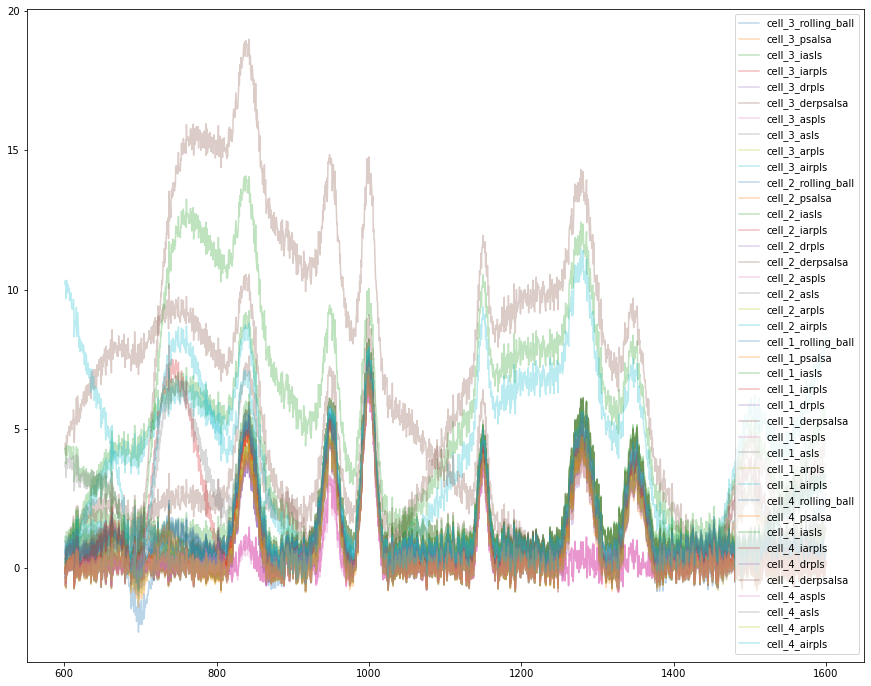

In [2]:
spectra_df = pd.read_csv("./output/2_correct_baseline/spectra.csv",index_col=0)
display(spectra_df)

fig = plt.figure(figsize=(15,12))
plt.plot(spectra_df,alpha=0.3,label=spectra_df.columns)
plt.legend()
plt.show()

In [3]:
cell_id = pd.Series(['_'.join( name.split("_")[:2]) for name in spectra_df.columns],index=spectra_df.columns, name='CorrectType')
method  = pd.Series([name.split("_")[2] for name in spectra_df.columns],index=spectra_df.columns, name='CorrectType')
spectra_df.loc["CellType",:] = cell_id
spectra_df.loc["Method",:]   = method
spectra_df = spectra_df.T
display(spectra_df)

,601.0,601.4997498749375,601.999499749875,602.4992496248124,602.9989994997499,603.4987493746873,603.9984992496248,604.4982491245623,604.9979989994997,605.4977488744372,...,1596.5017508754377,1597.0015007503753,1597.5012506253129,1598.00100050025,1598.5007503751876,1599.0005002501252,1599.5002501250626,1600.0,CellType,Method
cell_3_rolling_ball,-0.372132,-0.057168,-0.065119,-0.436969,0.328308,0.281078,0.065041,0.470618,0.467996,0.502128,...,0.429079,0.277816,0.540593,0.340049,0.63879,0.739959,0.812675,0.750018,cell_3,rolling
cell_3_psalsa,-0.62686,-0.313921,-0.324139,-0.698492,0.064049,0.013865,-0.204035,0.199476,0.194597,0.226292,...,-0.080552,-0.235075,0.024436,-0.17938,0.116084,0.213974,0.283409,0.217472,cell_3,psalsa
cell_3_iasls,-0.0264,0.305558,0.314355,-0.04099,0.740546,0.709332,0.510368,0.932774,0.946736,0.997208,...,0.467814,0.315023,0.576272,0.3742,0.671413,0.771053,0.842241,0.778056,cell_3,iasls
cell_3_iarpls,-0.613445,-0.304997,-0.319703,-0.698537,0.059538,0.004909,-0.217403,0.181738,0.172541,0.199979,...,-0.131843,-0.288104,-0.030349,-0.235934,0.057749,0.153849,0.221491,0.153759,cell_3,iarpls
cell_3_drpls,-0.608734,-0.30573,-0.325874,-0.710133,0.042542,-0.017442,-0.245047,0.148882,0.134577,0.157031,...,-0.189738,-0.344441,-0.085127,-0.289161,0.006068,0.10371,0.172891,0.106698,cell_3,drpls
cell_3_derpsalsa,-0.006418,0.330054,0.343365,-0.007467,0.778582,0.751881,0.557431,0.984349,1.002824,1.057809,...,0.344384,0.191118,0.451893,0.249345,0.546083,0.645249,0.715962,0.651302,cell_3,derpsalsa
cell_3_aspls,-0.486101,-0.199331,-0.235661,-0.635962,0.100954,0.025684,-0.216583,0.16342,0.136081,0.146516,...,-0.166352,-0.327775,-0.075642,-0.287281,0.0,0.089481,0.150395,0.075897,cell_3,aspls
cell_3_asls,-0.36983,-0.041632,-0.036594,-0.395699,0.382079,0.347109,0.144392,0.563047,0.573264,0.619995,...,0.228623,0.075849,0.337116,0.13506,0.43229,0.531948,0.603152,0.538985,cell_3,asls
cell_3_arpls,-0.660158,-0.35318,-0.369357,-0.749659,0.00695,-0.049139,-0.272905,0.124793,0.114167,0.140193,...,-0.175663,-0.330192,-0.070696,-0.274537,0.020895,0.118746,0.188139,0.12216,cell_3,arpls
cell_3_airpls,-0.293534,0.036393,0.04316,-0.314216,0.46529,0.432047,0.231057,0.651437,0.663376,0.711828,...,0.269183,0.116493,0.377844,0.175873,0.473188,0.57293,0.644219,0.580136,cell_3,airpls


In [4]:
#マルチインデックスによってCellTypeとMethodで絞り込めるようにする
spectra_df = spectra_df.sort_values(by="Method")
spectra_multidf = spectra_df.set_index(["Method","CellType"])
display(spectra_multidf)

601.000000  601.499750  601.999500  602.499250   \
Method    CellType                                                   
airpls    cell_2     -0.187839    0.043995   -0.017717   -0.425535   
          cell_1      0.562876    0.756728    0.657027    0.211212   
          cell_3     -0.293534    0.036393     0.04316   -0.314216   
          cell_4     10.178037   10.323568   10.175002    9.679786   
arpls     cell_1     -0.193997    0.001216   -0.097124   -0.541573   
          cell_4     -0.161901    0.037104   -0.057986   -0.499724   
          cell_2     -0.202886   -0.007824   -0.106306   -0.550891   
          cell_3     -0.660158    -0.35318   -0.369357   -0.749659   
asls      cell_1      0.396678    0.590133    0.490035    0.043823   
          cell_4      3.623275    3.811086    3.704801    3.251865   
          cell_2      -0.11002    0.098557    0.013588   -0.417488   
          cell_3      -0.36983   -0.041632   -0.036594   -0.395699   
aspls     cell_4     -0.197751         0.0   -0.096293    -0.53916   
          cell_1     -0.192563         0.0    -0.10094   -0.547914   
          cell_2     -0.192515        -0.0   -0.100979   -0.547985   
          cell_3     -0.486101   -0.199331   -0.235661   -0.635962   
derpsalsa cell_4      0.324798    0.525541    0.432188   -0.007816   
          cell_2      4.271239    4.499397    4.434009    4.022514   
          cell_1      0.563243    0.757558    0.658318    0.212965   
          cell_3     -0.006418    0.330054    0.343365   -0.007467   
drpls     cell_4     -0.191398    0.007925   -0.086844   -0.528257   
          cell_1     -0.189522     0.00525   -0.093527    -0.53841   
          cell_3     -0.608734    -0.30573   -0.325874   -0.710133   
          cell_2     -0.198476   -0.003461   -0.101988   -0.546615   
iarpls    cell_1     -0.167488    0.029867    -0.06633   -0.508637   
          cell_3     -0.613445   -0.304997   -0.319703   -0.698537   
          cell_4      -0.20024    0.002127     -0.0896   -0.527974   
          cell_2     -0.188135    0.008877   -0.087655   -0.530291   
iasls     cell_2      0.144199    0.376098    0.314452   -0.093301   
          cell_3       -0.0264    0.305558    0.314355    -0.04099   
          cell_1      0.958231    1.151374    1.050964     0.60444   
          cell_4      4.128631    4.308982    4.195238    3.734843   
psalsa    cell_1      -0.11105    0.085496   -0.011512   -0.454632   
          cell_3      -0.62686   -0.313921   -0.324139   -0.698492   
          cell_2     -0.180175    0.016266   -0.080838   -0.524047   
          cell_4     -0.104665     0.09252    -0.00439    -0.44795   
rolling   cell_4      0.472633     0.66562    0.564675    0.117243   
          cell_1      0.804245    0.988766    0.879734    0.424588   
          cell_2      0.178307    0.373975    0.276324   -0.167206   
          cell_3     -0.372132   -0.057168   -0.065119   -0.436969   

                   602.998999  603.498749  603.998499  604.498249   \
Method    CellType                                                   
airpls    cell_2      0.315897    0.253696    0.030807    0.434954   
          cell_1      0.914641    0.814433    0.553532    0.919663   
          cell_3       0.46529    0.432047    0.231057    0.651437   
          cell_4     10.333279   10.182604    9.870711   10.185327   
arpls     cell_1      0.163229    0.064408   -0.195083    0.172485   
          cell_4      0.207252    0.110072    -0.14831    0.219838   
          cell_2      0.153781    0.054836   -0.204776    0.162675   
          cell_3       0.00695   -0.049139   -0.272905    0.124793   
asls      cell_1      0.746854    0.646248     0.38495    0.750683   
          cell_4      3.947637    3.839242    3.569628    3.926523   
          cell_2      0.300686    0.215228   -0.030919     0.34997   
          cell_3      0.382079    0.347109    0.144392    0.563047   
aspls     cell_4      0.166833    0.068945   -0.189776    0.178458   
          cell_1      0.1545

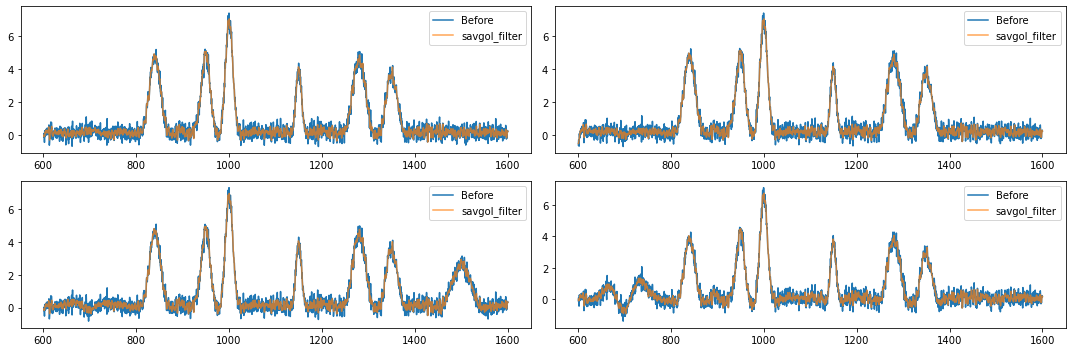

In [5]:
#数が多いので性能の良かったpsalsaのみスムージング
#理論データと比較
true_spectrum  = pd.read_csv("./simulated_spectrum/true_spectrum/spectrum.asc" ,sep="\t",index_col=0)
true_baselines = pd.read_csv("./simulated_spectrum/true_baselines/spectra.asc" ,sep="\t",index_col=0)

psalsa = spectra_multidf.loc["psalsa",:]
#savgol_filter(data,windowsize,order) データ，窓サイズ，次数
smoothing = pd.DataFrame(signal.savgol_filter(psalsa,7,3).T,columns=psalsa.index,index=psalsa.columns)
psalsa = psalsa.T

mses = []
fig = plt.figure(figsize=(15,5))
for i in range(4):
    
    mses.append(mean_squared_error(true_spectrum,smoothing.iloc[:,i]))
    ax = fig.add_subplot(2,2,i+1)
    ax.plot(psalsa.   iloc[:,i]                  ,label="Before"         ,alpha=1)
    ax.plot(smoothing.iloc[:,i]                  ,label="savgol_filter"  ,alpha=0.7)
    #移動平均
    #ax.plot(psalsa.   iloc[:,i].rolling(3).mean(),label="rolling(3) maen",alpha=0.3)
    ax.legend()
plt.tight_layout()
plt.show()

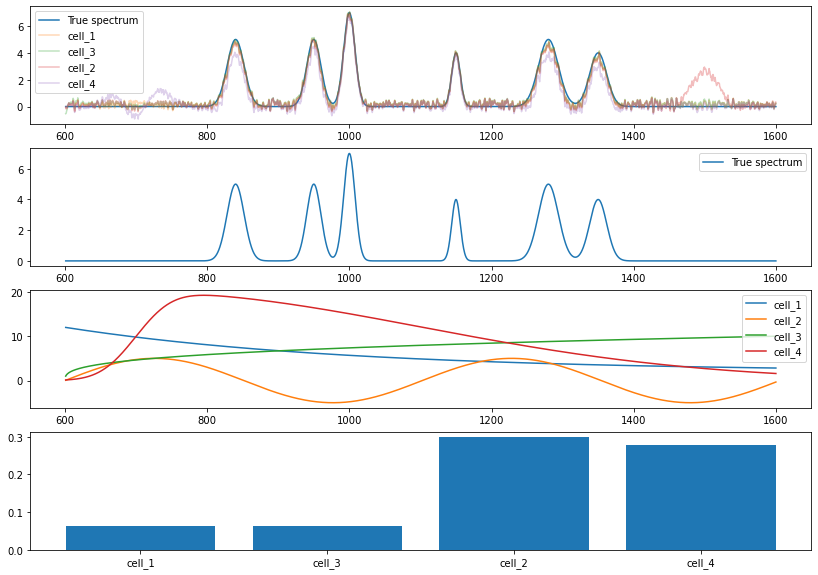

In [6]:
#単調減少,単調増加するようなベースライン(cell_1,cell_3)に対して性能が悪いことがわかる．

fig = plt.figure(figsize=(14,10))

ax_spectra = fig.add_subplot(4,1,1)
ax_spectra.plot(true_spectrum,label="True spectrum")
ax_spectra.plot(smoothing,alpha=0.3,label=smoothing.columns)
ax_spectra.legend()

ax_true = fig.add_subplot(4,1,2)
ax_true.plot(true_spectrum,label="True spectrum")
ax_true.legend()

ax_background = fig.add_subplot(4,1,3)
ax_background.plot(true_baselines,label=true_baselines.columns)
ax_background.legend()

ax_err = fig.add_subplot(4,1,4)
ax_err.bar(smoothing.columns,mses)

plt.show()

In [7]:
#psalsaに対しsavgol_filterを適用した結果を出力
display(smoothing)
smoothing.to_csv("./output/3_smoothing/spectra.csv")

CellType,cell_1,cell_3,cell_2,cell_4
601.000000,-0.016822,-0.531924,-0.085948,-0.010437
601.499750,-0.111349,-0.512523,-0.180579,-0.104324
601.999500,-0.097127,-0.409220,-0.166453,-0.090005
602.499250,-0.028265,-0.270874,-0.097680,-0.021584
602.998999,-0.051946,-0.238812,-0.121442,-0.046240
...,...,...,...,...
1598.001001,-0.062377,-0.041979,0.037871,-0.104288
1598.500750,0.073889,0.094233,0.176839,0.032788
1599.000500,0.180451,0.200752,0.286129,0.140233
1599.500250,0.238084,0.258353,0.346513,0.198822
